## **Prediction using Supervised Machine Learning (Linear Regression)**
In this simple linear regression task we will predict the percentage of an student based on the number of study hours.
### Rajat Agrawal
Email: rajat.visitme@gmail.com<br><br>
April 2021 | GRIP - The Sparks Foundation | Task 1

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

#Note: please install these libraries before using them (for windows): pip install <package-name>

In [2]:
# Reading the data into a dataframe 'stu_data'
url = "http://bit.ly/w-data"
stu_data = pd.read_csv(url)

#Printing the first five rows of the dataframe (i.e. head of the dataframe)
stu_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Understanding the Data

In [3]:
#Cheacking the shape and size of the dataframe

print("Length of the dataframe (i.e. number of rows): ",len(stu_data))
print("Shape of the dataframe (i.e. number of rows and columns): ", stu_data.shape)

Length of the dataframe (i.e. number of rows):  25
Shape of the dataframe (i.e. number of rows and columns):  (25, 2)


There are 25 tuples (rows) and 2 attributes (columns).

In [4]:
#Printing the attributes name of the dataframe.
stu_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
#More information of the data can be obtained by calling the info() method on the dataframe.
stu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We know that there are two attributes, 'Hours' at index 0 and 'Scores' at index 1.<br>
And the data type of these attributes are 'object'.<br>
**Note**: 'object' data type is for the name of the attributes (labels) but not for their values. As ***'Hours'*** holds the values of data type ***float*** and ***'Scores'*** holds the values of data type ***int***.

### Analysing the Data

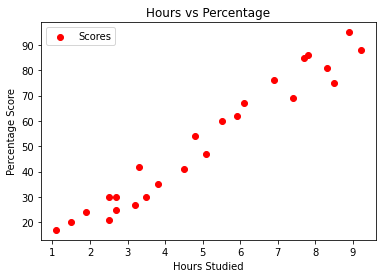

In [6]:
# Plotting the distribution of scores
Hours = stu_data.iloc[:, :-1].values
Scores = stu_data.iloc[:, 1].values
plt.scatter(Hours,
            Scores, 
            label='Scores', 
            color='r')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend()
plt.show()


In [7]:
#Pairwise correlation of all columns in the dataframe.
#The correlation of a variable with itself is 1.
stu_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Data Preparation and Algorithm Training

In [8]:
#Preparing the data by splitting it into training and test sets.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression

X_train, X_test, y_train, y_test = train_test_split(Hours, Scores, 
                            test_size=0.2, random_state=0)
#Training the algorithm.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

**Plotting the regression line**<br>
y = m * x + c<br>
Here, m is the coefficient or slope,<br>
  and c is the intercept.

In [9]:
line = regressor.coef_ * Hours + regressor.intercept_
print("Shape of the 'line' (y) variable: ", line.shape)
print("Shape of the 'Hours' (X) variable: ", Hours.shape)

Shape of the 'line' (y) variable:  (25, 1)
Shape of the 'Hours' (X) variable:  (25, 1)


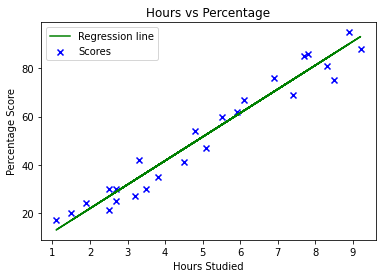

In [10]:
# Plotting for the data
plt.scatter(Hours, Scores, label='Scores', marker = 'x', color='b')
# Plotting the line.
plt.plot(Hours, line, label='Regression line', color='g');

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend()
plt.show()

### **Making Predictions**

In [11]:
# Test data - Number of Hours.
print(X_test)

# Predicting the Scores.
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Now we are creating another dataframe for Actual Percentage vs Predicted Percentage.
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


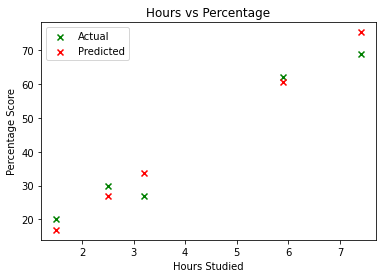

In [13]:
Actual_percentage = comp.Actual
Predicted_percentage = comp.Predicted
# Plotting the Actual Percentage
plt.scatter(X_test, Actual_percentage, label='Actual', marker = 'x', color='g')

# Plotting the Predicted Percentage
plt.scatter(X_test, Predicted_percentage, label='Predicted', marker = 'x', color='r')

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend()
plt.show()

In [14]:
# Testing with own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0].round(2)))

# Hours (Own data)
new_h = np.array([3.5, 7.1, 1.8, 5.0, 4.2, 9.25]).reshape(6, 1)
# Predicting the percentages for given new hours.
new_pred = regressor.predict(new_h)
# Now creating another dataframe for new hours vs predicted percentages.
new_h = new_h.reshape(6)
new_data = pd.DataFrame({'New_Hours': new_h, 'New_Scores': new_pred})  
new_data

No of Hours = [[9.25]]
Predicted Score = 93.69


,New_Hours,New_Scores
0,3.50,36.705458
1,7.10,72.383821
2,1.80,19.857342
3,5.00,51.571442
4,4.20,43.642917
5,9.25,93.691732


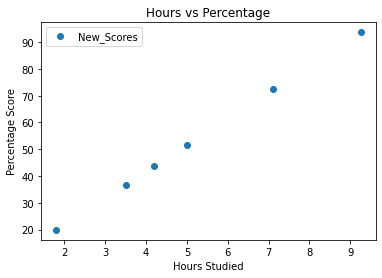

In [15]:
# Plotting the distribution of scores for new data.
new_data.plot(x='New_Hours', y='New_Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **Evaluating the model**

Evaluate the performance of algorithm.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
